<a href="https://colab.research.google.com/github/SimarBhatiaSB7/EDA-Project-22BDS0046/blob/main/22BDS0046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
from google.colab import files
dataset = files.upload()

Saving KosteckiDillon.csv to KosteckiDillon (1).csv


In [64]:
import pandas as pd

df_0046 = pd.read_csv('KosteckiDillon.csv')
print(df_0046.head(7))

   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female


In [65]:
# Dimensions of the table
print("Dataset Dimensions:", df_0046.shape)

Dataset Dimensions: (4152, 10)


The dataset has 4,152 rows and 10 columns, which is a moderately large dataset, suitable for statistical analysis and visual exploration.

In [66]:
# Summary Statistics

print("Summary Statistics:")
print(df_0046.describe(include='all'))

print("\nData Types: ")
print(df_0046.dtypes)

Summary Statistics:
           rownames           id         time          dos   hatype  \
count   4152.000000  4152.000000  4152.000000  4152.000000     4152   
unique          NaN          NaN          NaN          NaN        3   
top             NaN          NaN          NaN          NaN  No Aura   
freq            NaN          NaN          NaN          NaN     1985   
mean    2076.500000    66.386802    15.455684   646.705925      NaN   
std     1198.723488    39.121812    21.737211   335.770123      NaN   
min        1.000000     1.000000   -29.000000    98.000000      NaN   
25%     1038.750000    33.000000     3.000000   384.000000      NaN   
50%     2076.500000    67.000000    12.000000   623.000000      NaN   
75%     3114.250000   100.000000    24.000000   950.000000      NaN   
max     4152.000000   133.000000    99.000000  1239.000000      NaN   

                age         airq  medication headache     sex  
count   4152.000000  4152.000000        4152     4152    4152  

The dataset contains both numeric (rownames, id, time, dos, age, airq) and categorical (hatype, medication, headache, sex) variables.

Some numeric columns (e.g., rownames, id, dos) have extremely high correlations, they might represent identifiers or sequential values rather than meaningful continuous variables.

In [67]:
#Data Handling

print("Missing Values:", pd.isna(df_0046).any())
print("\nDuplicated Values:", df_0046.duplicated())

Missing Values: rownames      False
id            False
time          False
dos           False
hatype        False
age           False
airq          False
medication    False
headache      False
sex           False
dtype: bool

Duplicated Values: 0       False
1       False
2       False
3       False
4       False
        ...  
4147    False
4148    False
4149    False
4150    False
4151    False
Length: 4152, dtype: bool


The dataset is clean in terms of completeness; no imputation is required, and no duplicate removal is necessary.

In [68]:
#Data Handling

# Drop duplicates
df_0046 = df_0046.drop_duplicates().copy()

# Fill missing values correctly
for col in df_0046.columns:
    if df_0046[col].dtype in ['int64', 'float64']:
        df_0046[col] = df_0046[col].fillna(df_0046[col].mean())
    else:
        df_0046[col] = df_0046[col].fillna(df_0046[col].mode()[0])

print("Clean Dataset:\n\n", df_0046.head(7))

Clean Dataset:

    rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female


In [69]:
#Data Binning

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80+']
df_0046_bin = df_0046.copy()
df_0046_bin['age_group'] = pd.cut(df_0046_bin['age'], bins=age_bins, labels=age_labels, right=False)

print("\nAge group counts:\n", df_0046_bin['age_group'].value_counts())

print("\n\nDataset binned by age:\n",df_0046_bin.head(7))


Age group counts:
 age_group
40-59    2261
20-39    1525
60-79     291
0-19       75
80+         0
Name: count, dtype: int64


Dataset binned by age:
    rownames  id  time  dos hatype  age  airq  medication headache     sex  \
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female   
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female   
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female   
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female   
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female   
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female   
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female   

  age_group  
0     20-39  
1     20-39  
2     20-39  
3     20-39  
4     20-39  
5     20-39  
6     20-39  


In [71]:
# Outlier Detection (IQR Method)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

num_cols = df_0046.select_dtypes(include=np.number).columns

outlier_summary = {}
for col in num_cols:
    Q1 = df_0046[col].quantile(0.25)
    Q3 = df_0046[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = df_0046[(df_0046[col] < lower) | (df_0046[col] > upper)].shape[0]
    outlier_summary[col] = outlier_count

    df_0046 = df_0046[(df_0046[col] >= lower) & (df_0046[col] <= upper)]

print("Outlier counts per numeric column:", outlier_summary)
print("Updated dataset after removing outliers:", df_0046.shape)

Outlier counts per numeric column: {'rownames': 0, 'id': 0, 'time': 139, 'dos': 0, 'age': 0, 'airq': 54}
Updated dataset after removing outliers: (3598, 10)


#Univariate Analysis


In [72]:
# Univariate Analysis
#Descriptive Statistics of the entire dataset
print(df_0046.describe(),"\n")

          rownames           id         time          dos          age  \
count  3598.000000  3598.000000  3598.000000  3598.000000  3598.000000   
mean   2123.062535    67.947193    12.003891   658.596165    42.449972   
std    1188.737084    38.722619    15.260812   332.183770    11.358912   
min       1.000000     1.000000   -24.000000   103.000000    18.000000   
25%    1137.250000    37.000000     3.000000   409.000000    33.000000   
50%    2169.500000    70.000000    11.000000   647.000000    44.000000   
75%    3129.750000   100.750000    20.000000   952.500000    51.000000   
max    4152.000000   133.000000    48.000000  1236.000000    66.000000   

              airq  
count  3598.000000  
mean     23.487382  
std       7.513350  
min       3.000000  
25%      18.000000  
50%      24.000000  
75%      28.000000  
max      43.000000   



Text(0.5, 0, 'Status')

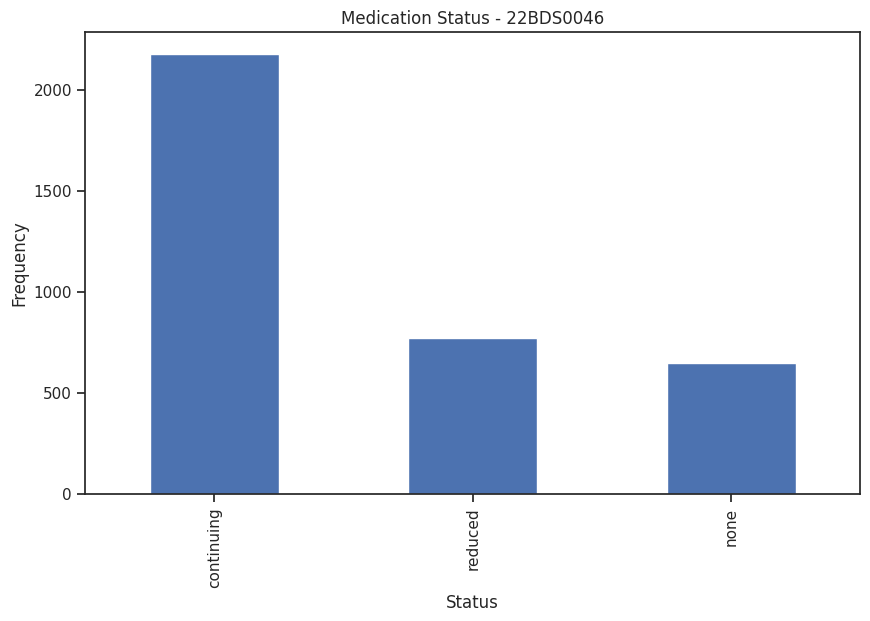

In [73]:
#Taking 50 largest values and draw a bar chart for medicine
df_0046.medication.value_counts().nlargest(100).plot(kind='bar', figsize=(10,6))
plt.title("Medication Status - 22BDS0046")
plt.ylabel('Frequency')
plt.xlabel('Status')

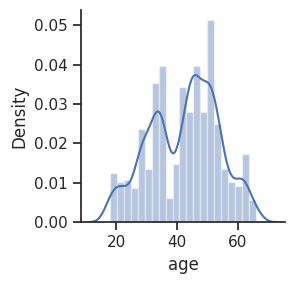

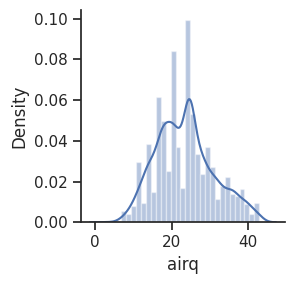

In [74]:
sns.FacetGrid(df_0046).map(sns.distplot,"age").add_legend()
print("\n")
sns.FacetGrid(df_0046).map(sns.distplot,"airq").add_legend()

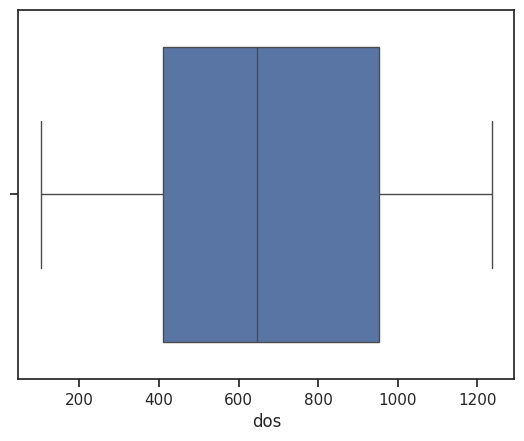

In [75]:
sns.boxplot(x="dos",data=df_0046)
plt.show()

#Bivariate Analysis

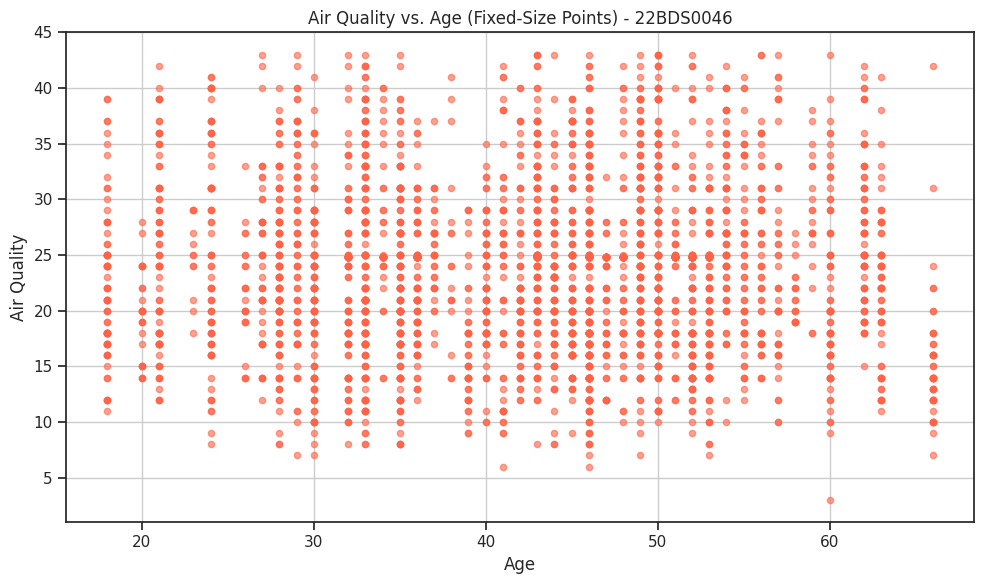

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(df_0046['age'], df_0046['airq'], s=20, alpha=0.6, color='tomato')
plt.title('Air Quality vs. Age (Fixed-Size Points) - 22BDS0046')
plt.xlabel('Age')
plt.ylabel('Air Quality')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_fixed_size.png')

In [78]:
#Relationship between two features
print(np.corrcoef(df_0046['age'], df_0046['airq']))
print("\n")
print(np.corrcoef(df_0046['age'], df_0046['dos']))
print("\n")
print(np.corrcoef(df_0046['dos'], df_0046['airq']))

[[ 1.         -0.00446175]
 [-0.00446175  1.        ]]


[[ 1.         -0.00836348]
 [-0.00836348  1.        ]]


[[ 1.         -0.09413457]
 [-0.09413457  1.        ]]


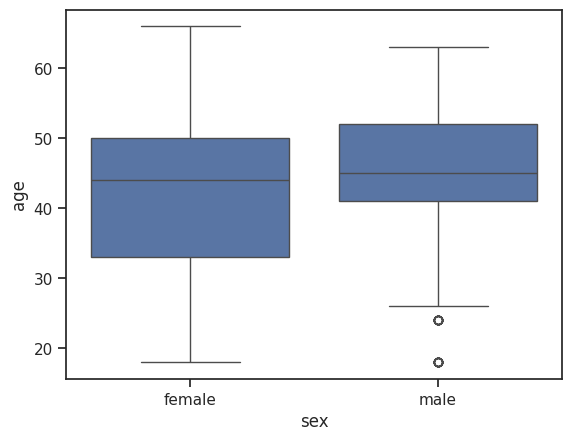

In [79]:
#Box plot
sns.boxplot(x="sex",y="age",data=df_0046)
plt.show()

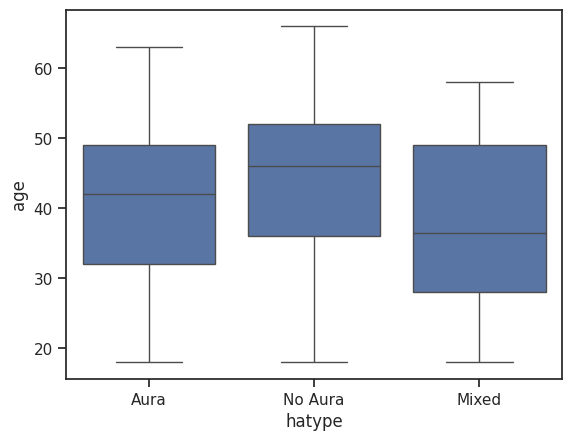

In [80]:
sns.boxplot(x="hatype",y="age",data=df_0046)
plt.show()

#Multivariate Analysis

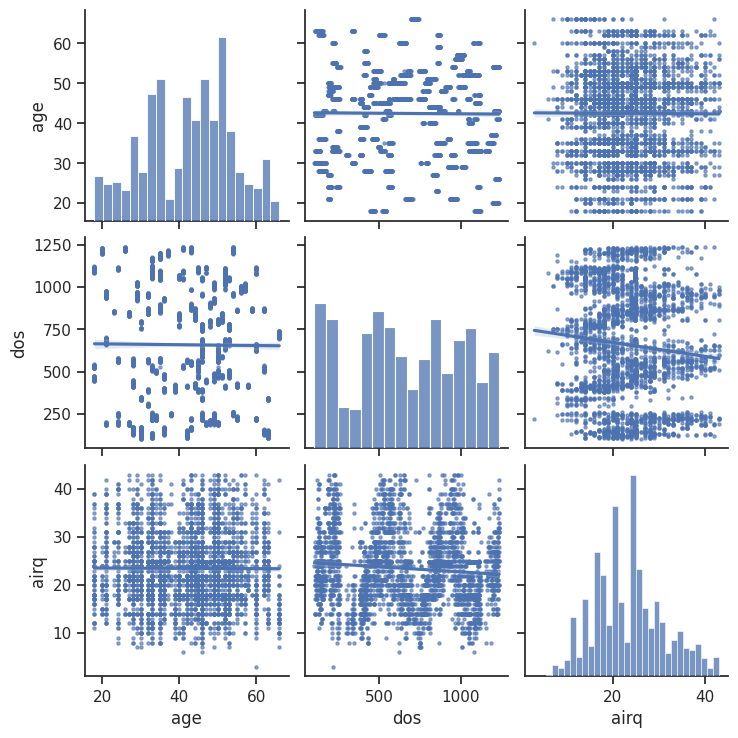

In [81]:
# pair plot with plot type regression
sns.pairplot(df_0046, vars=['age', 'dos', 'airq'], kind="reg", plot_kws={'scatter_kws': {'s': 5, 'alpha': 0.6}})
plt.show()

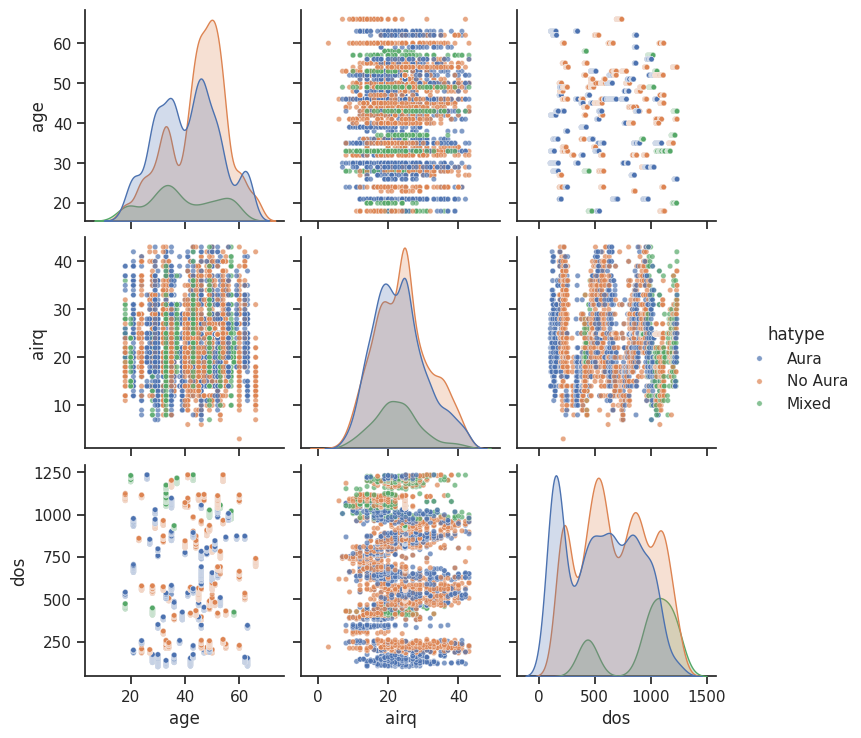

In [82]:
sns.set(style="ticks")
sns.pairplot(df_0046,
             vars=['age', 'airq', 'dos'],
             hue='hatype',
             height=2.5,
             plot_kws={'s': 15, 'alpha': 0.7})
plt.show()

In [83]:
correlation = df_0046.corr(method='pearson', numeric_only=True)
correlation

,rownames,id,time,dos,age,airq
rownames,1.000000,0.999373,-0.113025,0.968444,0.026930,-0.067010
id,0.999373,1.000000,-0.117991,0.968131,0.028294,-0.065315
time,-0.113025,-0.117991,1.000000,-0.073291,-0.032020,0.043880
dos,0.968444,0.968131,-0.073291,1.000000,-0.008363,-0.094135
age,0.026930,0.028294,-0.032020,-0.008363,1.000000,-0.004462
airq,-0.067010,-0.065315,0.043880,-0.094135,-0.004462,1.000000


<Axes: >

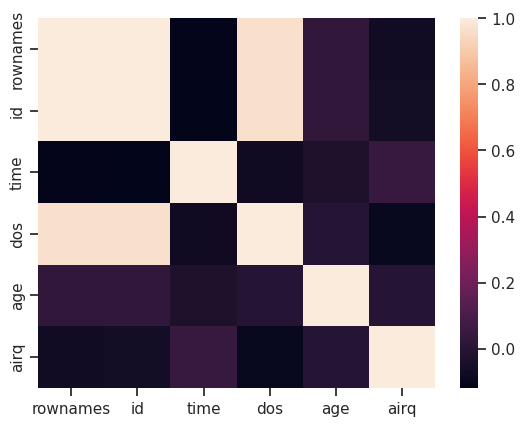

In [84]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

#Time Series Analysis

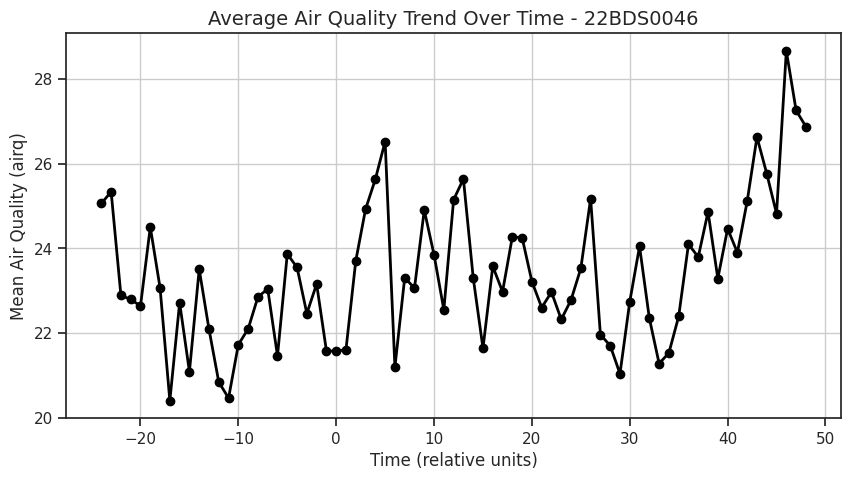

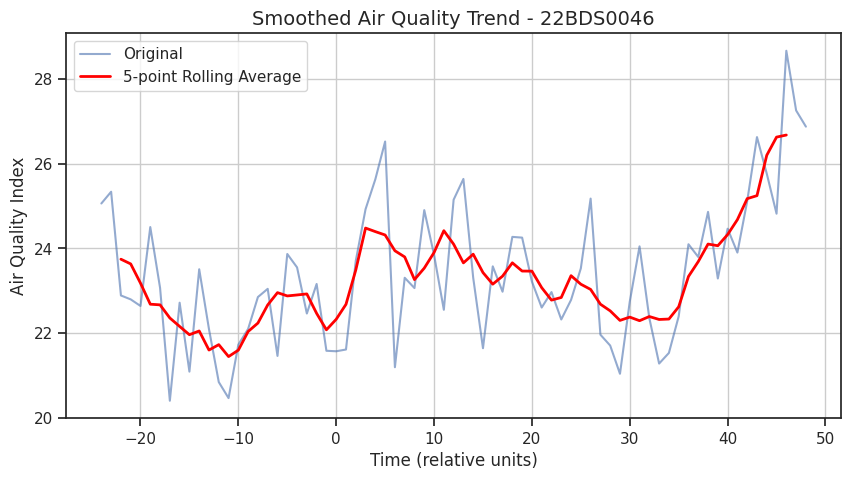

In [86]:
# Average Air Quality Trend
avg_trend = df_0046.groupby("time")["airq"].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_trend.index, avg_trend.values, marker='o', linewidth=2, color='black')
plt.title("Average Air Quality Trend Over Time - 22BDS0046", fontsize=14)
plt.xlabel("Time (relative units)")
plt.ylabel("Mean Air Quality (airq)")
plt.grid(True)
plt.show()

# Smoothed Rolling Average Trend
rolling_avg = avg_trend.rolling(window=5, center=True).mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_trend.index, avg_trend.values, label="Original", alpha=0.6)
plt.plot(rolling_avg.index, rolling_avg.values, color='red', linewidth=2, label="5-point Rolling Average")
plt.title("Smoothed Air Quality Trend - 22BDS0046", fontsize=14)
plt.xlabel("Time (relative units)")
plt.ylabel("Air Quality Index")
plt.legend()
plt.grid(True)
plt.show()


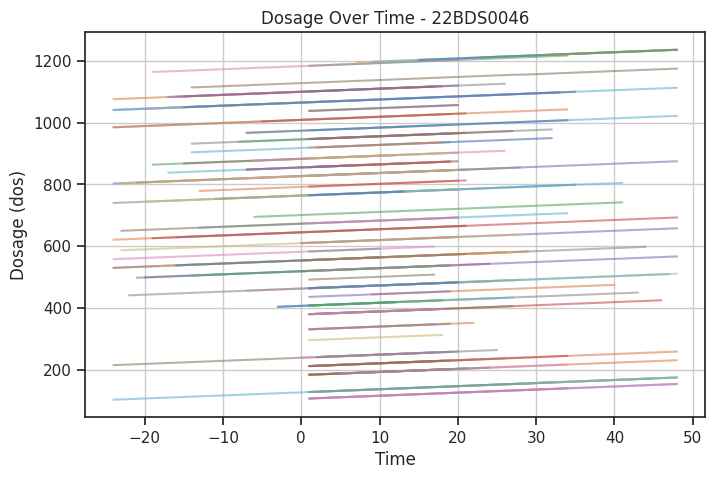

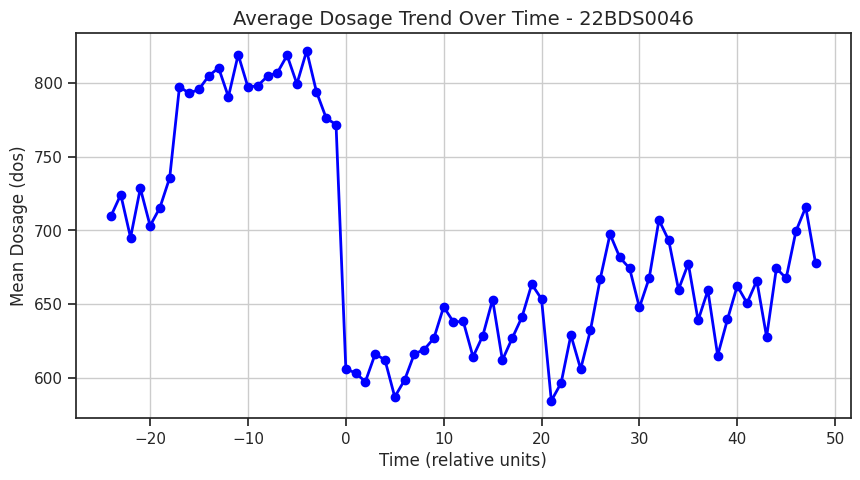

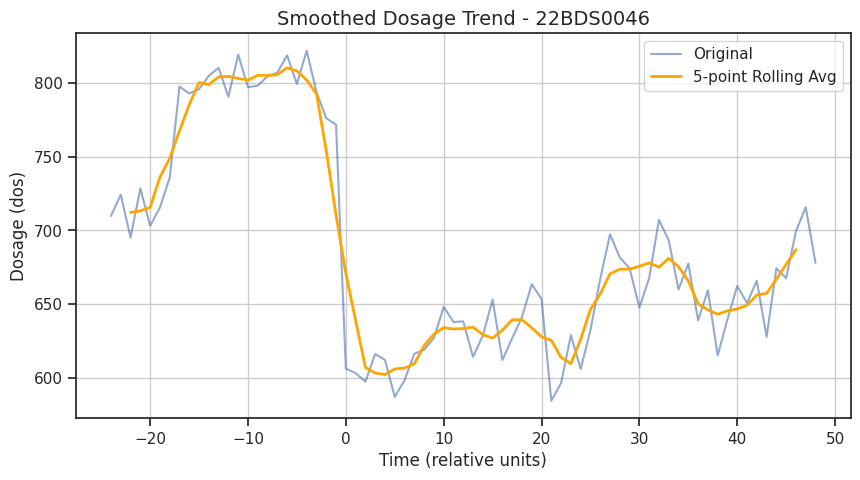

In [87]:
# DOSE (dos) Trend Over Time
plt.figure(figsize=(8, 5))
for pid, group in df_0046.groupby("id"):
    plt.plot(group["time"], group["dos"], alpha=0.6)
plt.title("Dosage Over Time - 22BDS0046")
plt.xlabel("Time")
plt.ylabel("Dosage (dos)")
plt.grid(True)
plt.show()

# Average Dosage Trend
avg_dos = df_0046.groupby("time")["dos"].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_dos.index, avg_dos.values, marker='o', linewidth=2, color='blue')
plt.title("Average Dosage Trend Over Time - 22BDS0046", fontsize=14)
plt.xlabel("Time (relative units)")
plt.ylabel("Mean Dosage (dos)")
plt.grid(True)
plt.show()

# Smoothed Dosage Trend
rolling_dos = avg_dos.rolling(window=5, center=True).mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_dos.index, avg_dos.values, alpha=0.6, label="Original")
plt.plot(rolling_dos.index, rolling_dos.values, color='orange', linewidth=2, label="5-point Rolling Avg")
plt.title("Smoothed Dosage Trend - 22BDS0046", fontsize=14)
plt.xlabel("Time (relative units)")
plt.ylabel("Dosage (dos)")
plt.legend()
plt.grid(True)
plt.show()


##1D Analysis

In [88]:
# Skewness and Quantiles
print("Skewness of Numerical Variables")
numeric_features = ['time', 'dos', 'age', 'airq']
skew_vals = df_0046[numeric_features].skew()
print(skew_vals)
print("\n" + "-"*60)


print("\nQuantiles (25%, 50%, 75%) of Numerical Variables")
quantile_vals = df_0046[numeric_features].quantile([0.25, 0.5, 0.75])
print(quantile_vals)
print("\n" + "-"*60)

Skewness of Numerical Variables
time    0.105748
dos    -0.020054
age    -0.179868
airq    0.375109
dtype: float64

------------------------------------------------------------

Quantiles (25%, 50%, 75%) of Numerical Variables
      time    dos   age  airq
0.25   3.0  409.0  33.0  18.0
0.50  11.0  647.0  44.0  24.0
0.75  20.0  952.5  51.0  28.0

------------------------------------------------------------



### Visualizing Frequency Distributions ###


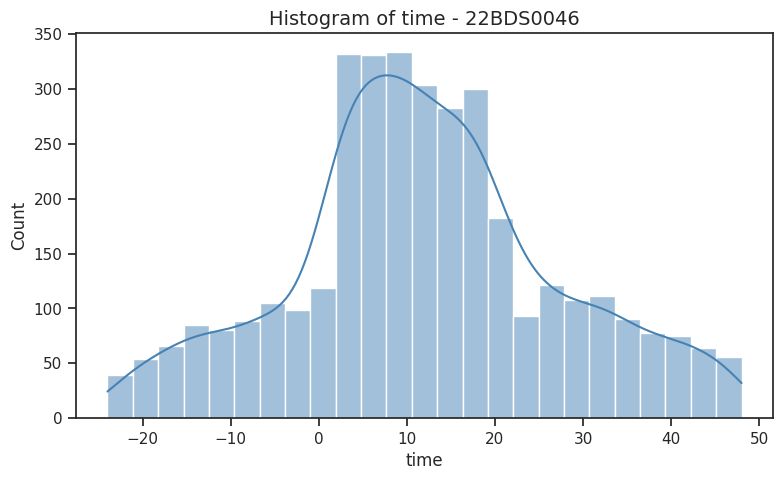

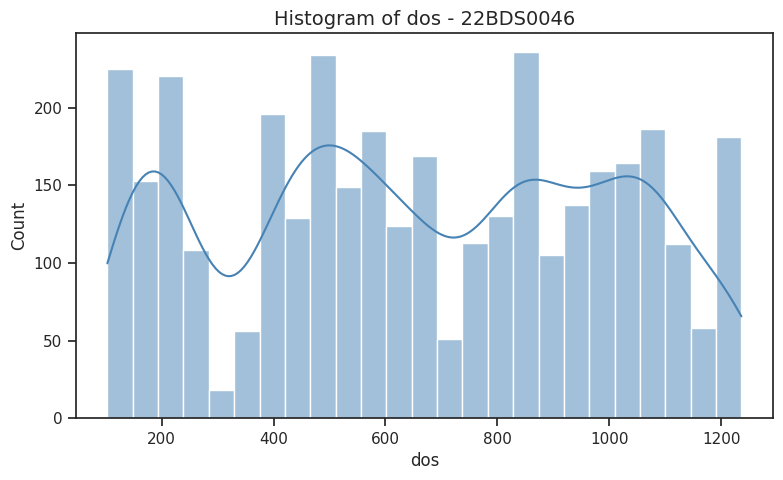

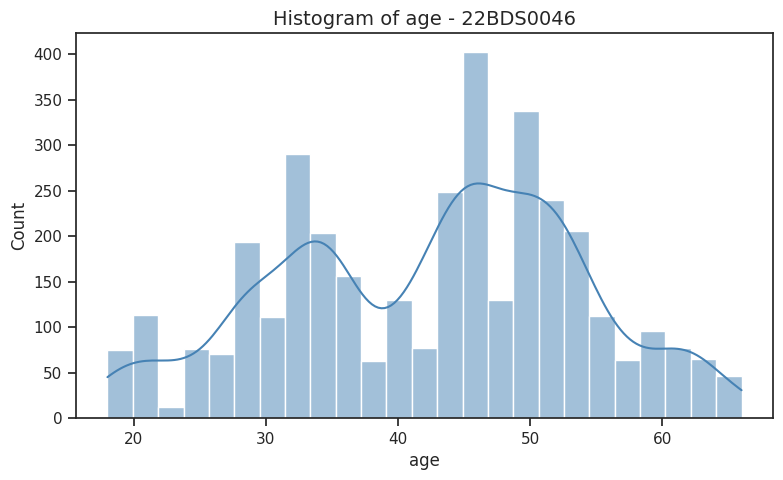

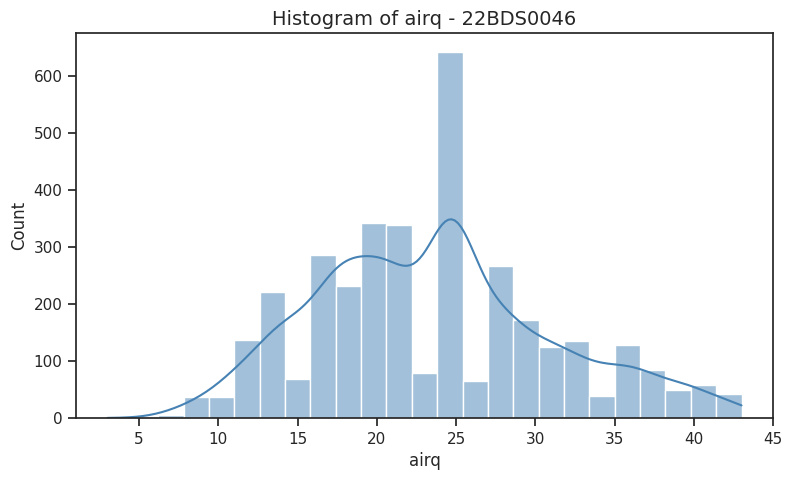

In [90]:
# Frequency Distributions (Histograms for Numerical Data)
print("\n### Visualizing Frequency Distributions ###")
for feature in numeric_features:
  plt.figure(figsize=(9, 5))
  sns.histplot(df_0046[feature], kde=True, bins=25, color="steelblue")
  plt.title(f"Histogram of {feature} - 22BDS0046", fontsize=14)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.show()


Categorical Variable Analysis

--- Distribution of Sex ---
        Count  Percentage
sex                      
female   3127       86.91
male      471       13.09


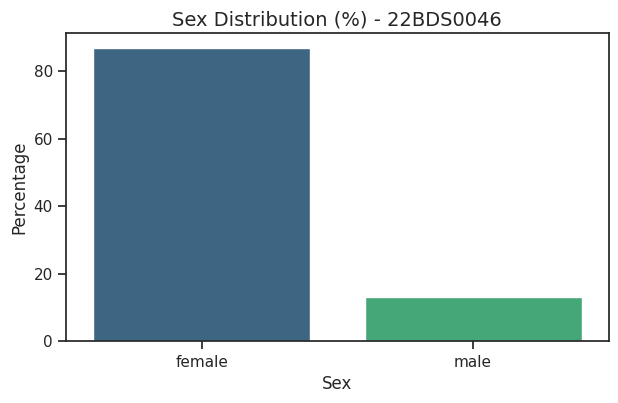


--- Distribution of Headache ---
          Count  Percentage
headache                   
yes        2307       64.12
no         1291       35.88


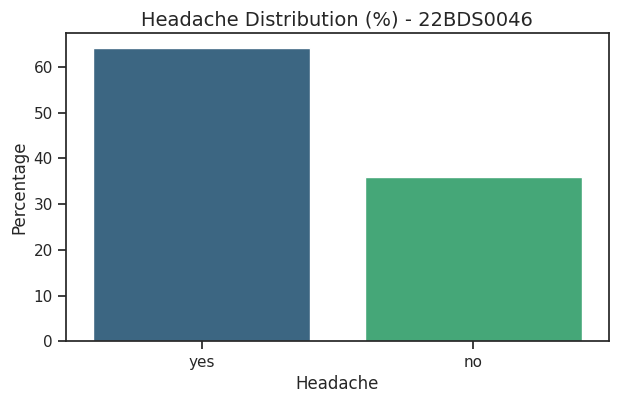


--- Distribution of Medication ---
            Count  Percentage
medication                   
continuing   2179       60.56
reduced       771       21.43
none          648       18.01


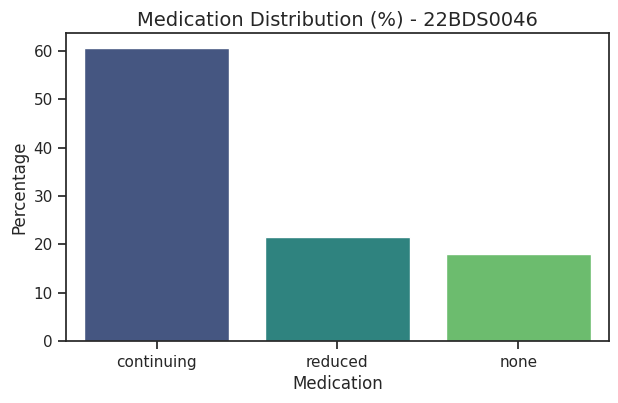


--- Distribution of Hatype ---
         Count  Percentage
hatype                    
No Aura   1667       46.33
Aura      1547       43.00
Mixed      384       10.67


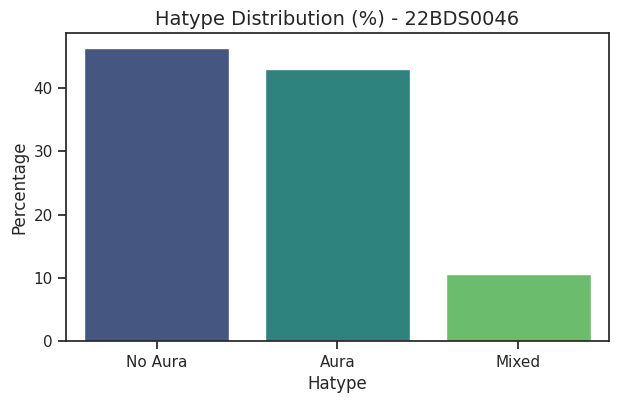

In [92]:
# Categorical Variable Analysis
print("\nCategorical Variable Analysis")

categorical_features = ['sex', 'headache', 'medication', 'hatype']

for cat in categorical_features:
  print(f"\n--- Distribution of {cat.capitalize()} ---")
  counts = df_0046[cat].value_counts()
  rel_freq = df_0046[cat].value_counts(normalize=True) * 100
  summary = pd.DataFrame({"Count": counts, "Percentage": rel_freq.round(2)})
  print(summary)


  plt.figure(figsize=(7, 4))
  sns.barplot(x=summary.index, y=summary['Percentage'], palette="viridis")
  plt.title(f"{cat.capitalize()} Distribution (%) - 22BDS0046", fontsize=14)
  plt.ylabel("Percentage")
  plt.xlabel(cat.capitalize())
  plt.show()

## 2D Analysis


Numerical vs Numerical 

Drawing Pairplot for numeric features...


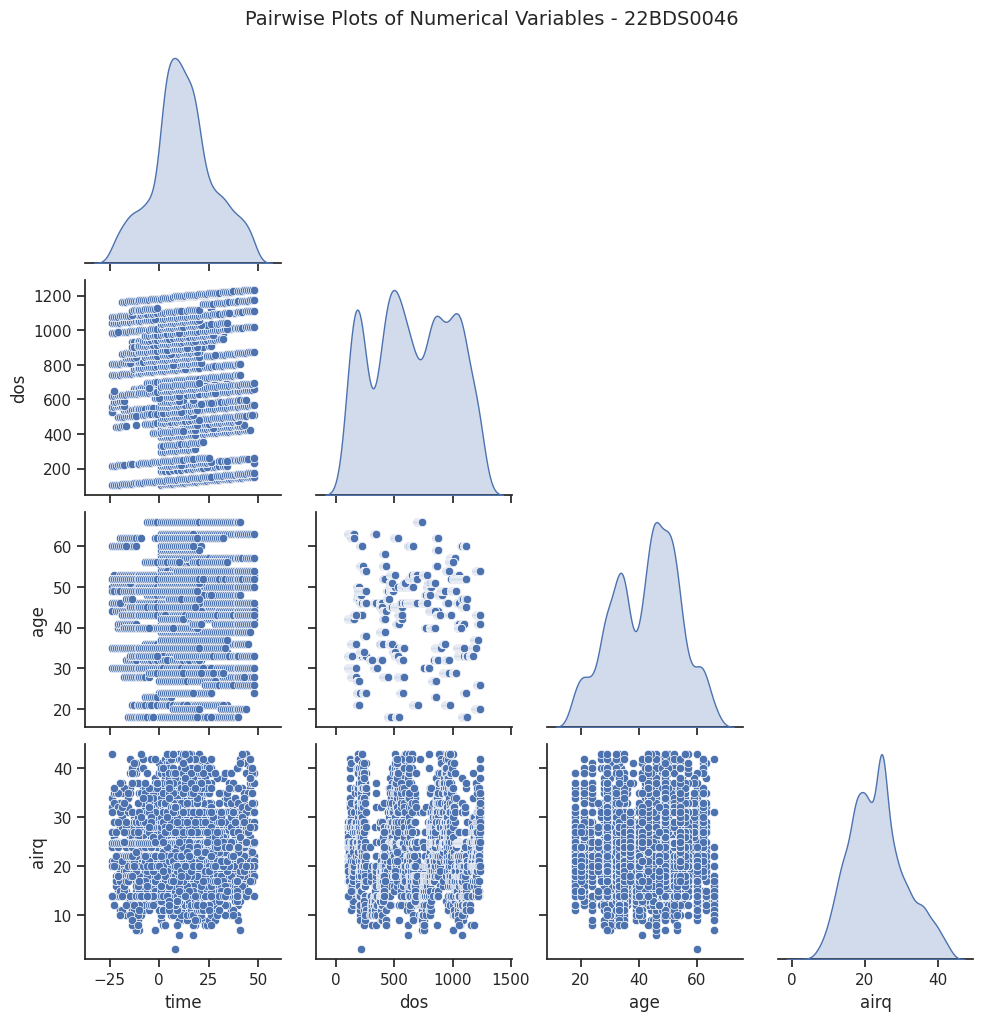


Scatterplot with regression line...


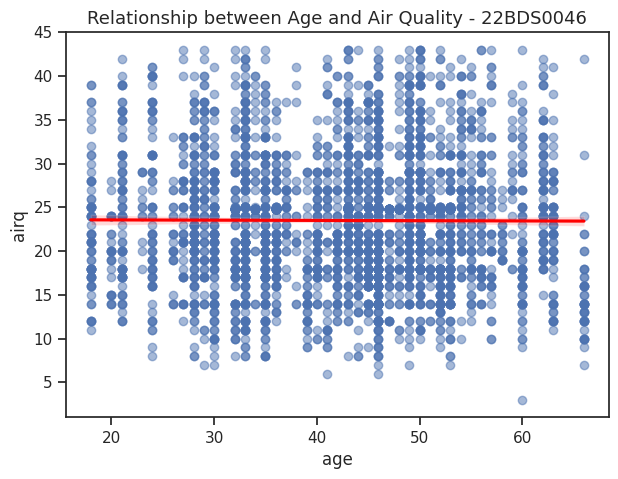

In [93]:
# 1. Numerical vs Numerical Relationships
print("\nNumerical vs Numerical ")

# a. Pairplot (gives quick overview of relationships)
print("\nDrawing Pairplot for numeric features...")
numeric_vars = ['time', 'dos', 'age', 'airq']
sns.pairplot(df_0046[numeric_vars], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Plots of Numerical Variables - 22BDS0046", y=1.02, fontsize=14)
plt.show()

# b. Regression Plot Example
print("\nScatterplot with regression line...")
plt.figure(figsize=(7,5))
sns.regplot(data=df_0046, x='age', y='airq', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Age and Air Quality - 22BDS0046", fontsize=13)
plt.show()


Numerical vs Categorical

Violin plot for Air Quality by Sex...


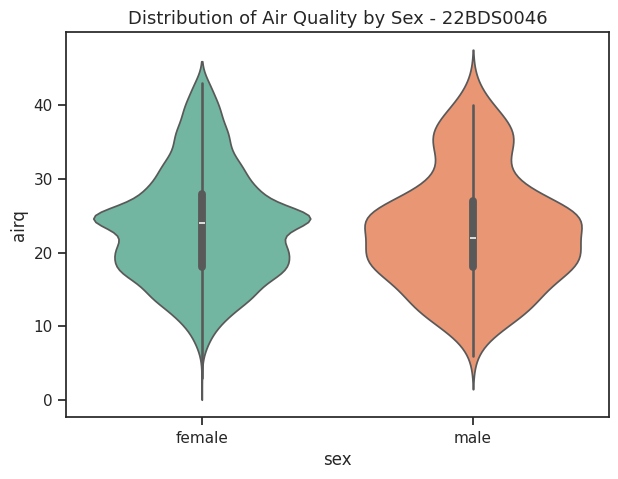


Strip plot for Age by Medication...


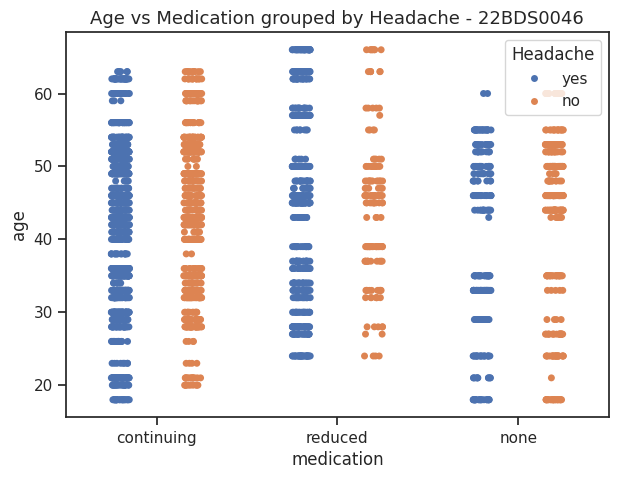

In [94]:
# 2. Numerical vs Categorical Relationships
print("\nNumerical vs Categorical")

# a. Violin Plot Example
print("\nViolin plot for Air Quality by Sex...")
plt.figure(figsize=(7,5))
sns.violinplot(data=df_0046, x='sex', y='airq', palette="Set2")
plt.title("Distribution of Air Quality by Sex - 22BDS0046", fontsize=13)
plt.show()

# b. Strip Plot Example
print("\nStrip plot for Age by Medication...")
plt.figure(figsize=(7,5))
sns.stripplot(data=df_0046, x='medication', y='age', jitter=True, hue='headache', dodge=True)
plt.title("Age vs Medication grouped by Headache - 22BDS0046", fontsize=13)
plt.legend(title='Headache')
plt.show()


>>> Categorical vs Categorical <<<

Generating Heatmap for Sex vs Headache...


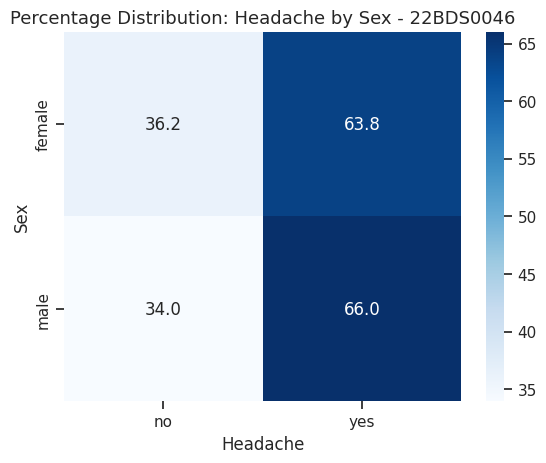


Creating Stacked Bar Chart for Medication vs Headache...


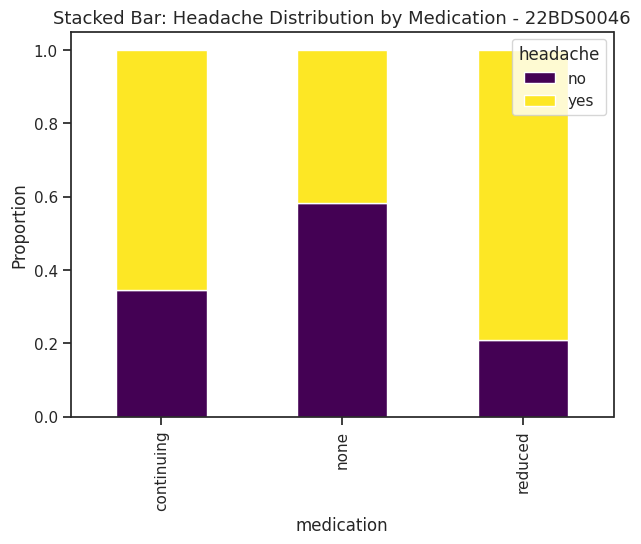

In [95]:
# 3. Categorical vs Categorical Relationships
print("\n>>> Categorical vs Categorical <<<")

# a. Heatmap from Crosstab
print("\nGenerating Heatmap for Sex vs Headache...")
crosstab_sh = pd.crosstab(df_0046['sex'], df_0046['headache'], normalize='index') * 100
sns.heatmap(crosstab_sh, annot=True, cmap='Blues', fmt='.1f')
plt.title("Percentage Distribution: Headache by Sex - 22BDS0046", fontsize=13)
plt.ylabel("Sex")
plt.xlabel("Headache")
plt.show()

# b. Stacked Bar Chart Example
print("\nCreating Stacked Bar Chart for Medication vs Headache...")
crosstab_mh = pd.crosstab(df_0046['medication'], df_0046['headache'])
crosstab_mh.div(crosstab_mh.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(7,5), colormap='viridis')
plt.title("Stacked Bar: Headache Distribution by Medication - 22BDS0046", fontsize=13)
plt.ylabel("Proportion")
plt.show()

## 3D Analysis

Visualizing 'age' across 'sex' grouped by 'hatype'


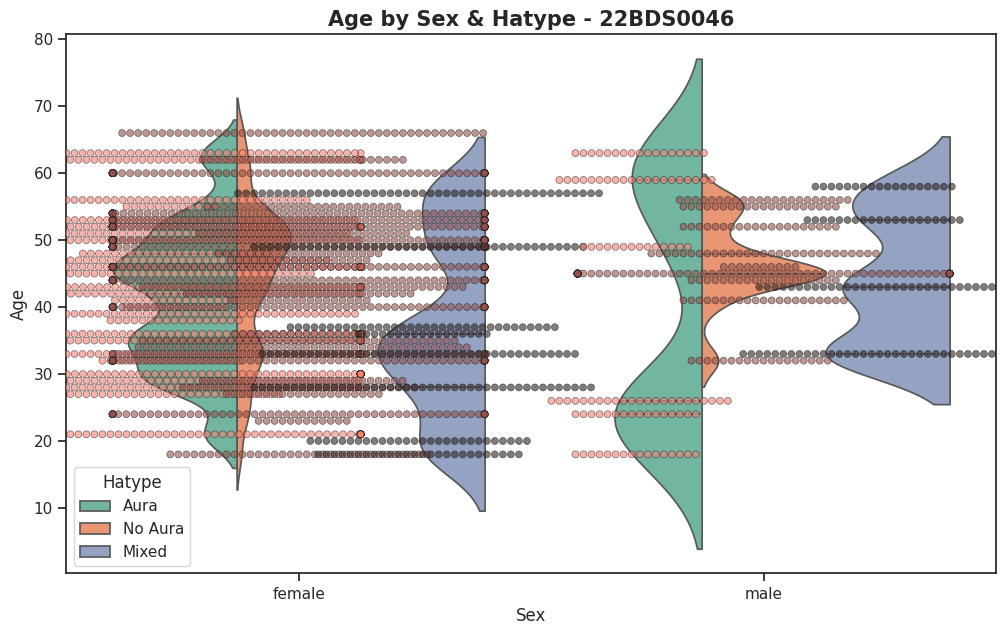


Facet grid for each hue category


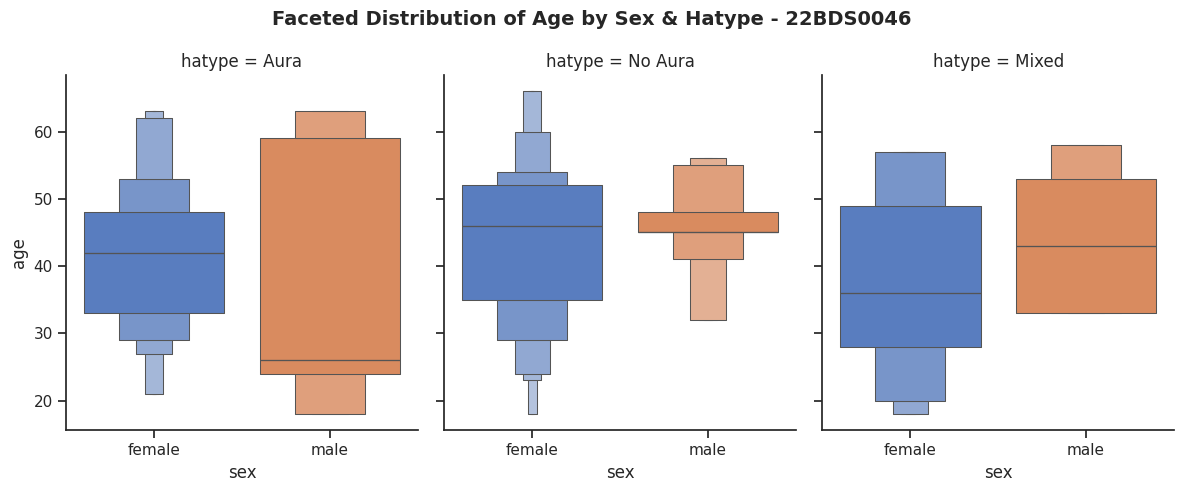

In [96]:
num_col = 'age'
cat_col_x = 'sex'
cat_col_hue = 'hatype'

print(f"Visualizing '{num_col}' across '{cat_col_x}' grouped by '{cat_col_hue}'")

plt.figure(figsize=(12, 7))

# Violin plot for distribution + swarm for raw points
sns.violinplot(data=df_0046,
               x=cat_col_x,
               y=num_col,
               hue=cat_col_hue,
               split=True,
               inner="quart",
               palette="Set2")

sns.swarmplot(data=df_0046,
              x=cat_col_x,
              y=num_col,
              hue=cat_col_hue,
              dodge=True,
              alpha=0.6,
              marker="o",
              edgecolor="gray",
              linewidth=0.5,
              palette="dark:salmon_r")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(set(df_0046[cat_col_hue]))],
           labels[:len(set(df_0046[cat_col_hue]))],
           title=cat_col_hue.replace("_", " ").title())

plt.title(f"{num_col.replace('_',' ').title()} by {cat_col_x.title()} & {cat_col_hue.title()} - 22BDS0046",
          fontsize=15, weight="bold")
plt.xlabel(cat_col_x.replace("_", " ").title())
plt.ylabel(num_col.replace("_", " ").title())
plt.show()

# FACETED VIEW
print("\nFacet grid for each hue category")
g = sns.catplot(data=df_0046,
                x=cat_col_x,
                y=num_col,
                col=cat_col_hue,
                kind="boxen",
                height=5,
                aspect=0.8,
                palette="muted")

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(f"Faceted Distribution of {num_col.title()} by {cat_col_x.title()} & {cat_col_hue.title()} - 22BDS0046",
               fontsize=14, weight="bold")
plt.show()


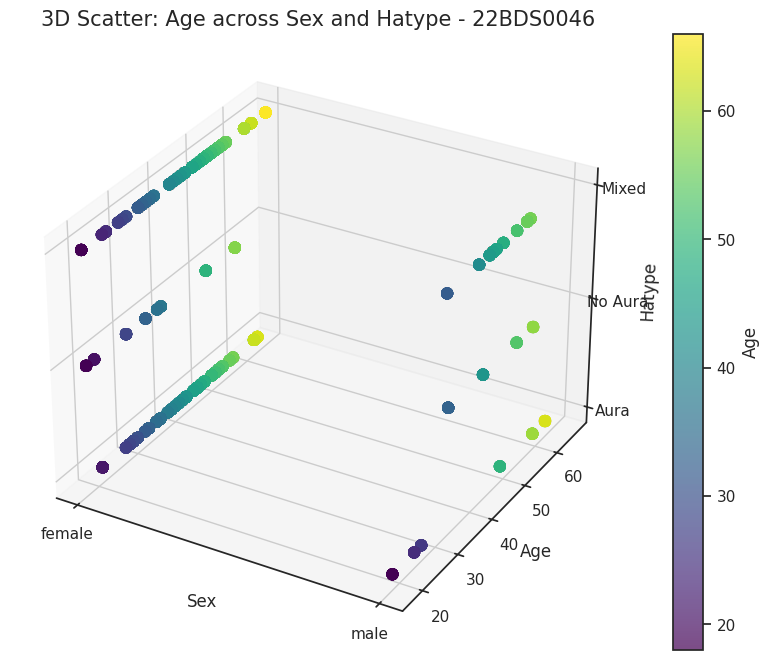

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 3D Analysis: Age vs Sex vs Hatype

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sex_codes = df_0046['sex'].astype('category').cat.codes
hatype_codes = df_0046['hatype'].astype('category').cat.codes

sc = ax.scatter(
    sex_codes,
    df_0046['age'],
    hatype_codes,
    c=df_0046['age'], cmap='viridis', s=60, alpha=0.7
)

ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_zlabel('Hatype')

ax.set_xticks(range(len(df_0046['sex'].unique())))
ax.set_xticklabels(df_0046['sex'].unique())

ax.set_zticks(range(len(df_0046['hatype'].unique())))
ax.set_zticklabels(df_0046['hatype'].unique())

cbar = plt.colorbar(sc)
cbar.set_label('Age')

plt.title('3D Scatter: Age across Sex and Hatype - 22BDS0046', fontsize=15)
plt.show()


#Clustering

🔹 Features chosen for clustering:
['rownames', 'time', 'dos', 'age', 'airq', 'sex_encoded']


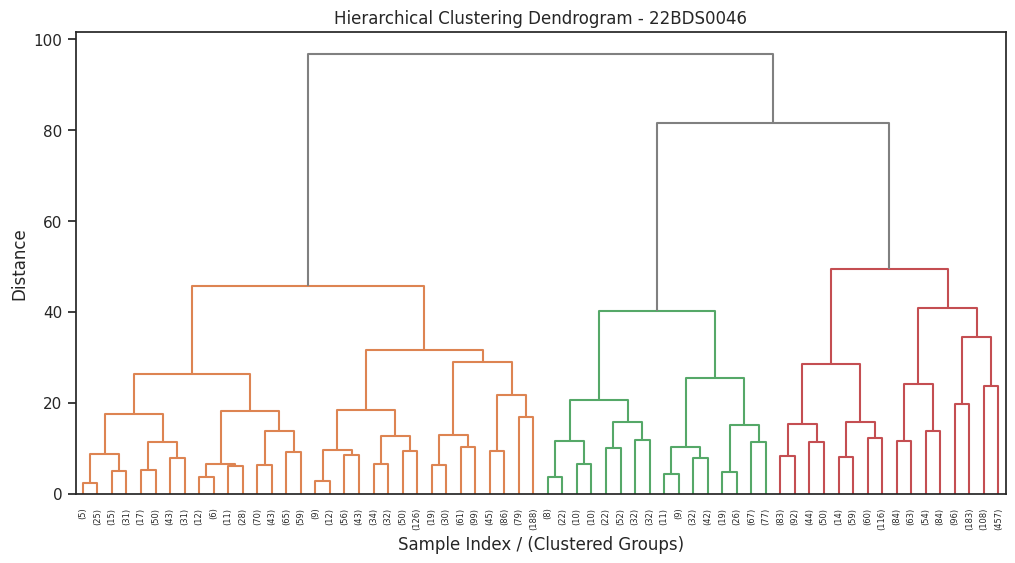


Cluster labels assigned with k=3:
cluster
3    1647
1    1480
2     471
Name: count, dtype: int64
      sex  age  airq  cluster
0  female   30   9.0        1
1  female   30   7.0        1
2  female   30  10.0        1
3  female   30  13.0        1
4  female   30  18.0        1


In [98]:
df_0046 = df_0046.dropna().copy()

df_0046.columns = (
    df_0046.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
)

le = LabelEncoder()
df_0046["sex_encoded"] = le.fit_transform(df_0046["sex"])


# 2. Feature Selection + Scaling

numeric_cols = df_0046.select_dtypes(include=np.number).columns.tolist()
for col in ["id"]:
    if col in numeric_cols:
        numeric_cols.remove(col)

X = df_0046[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("🔹 Features chosen for clustering:")
print(numeric_cols)
print("=" * 60)

# 3. Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    truncate_mode="level",   # Show top levels for readability
    p=5,                     # show 5 cluster levels
    color_threshold=None,
    above_threshold_color="grey"
)
plt.title("Hierarchical Clustering Dendrogram - 22BDS0046")
plt.xlabel("Sample Index / (Clustered Groups)")
plt.ylabel("Distance")
plt.show()

# 4. Cluster Assignment
k = 3
df_0046["cluster"] = fcluster(linkage_matrix, k, criterion="maxclust")

print(f"\nCluster labels assigned with k={k}:")
print(df_0046["cluster"].value_counts())
print("=" * 60)

# Quick look at cluster assignments
print(df_0046[["sex", "age", "airq", "cluster"]].head())


#Dimensionality Reduction

Principal Component Analysis

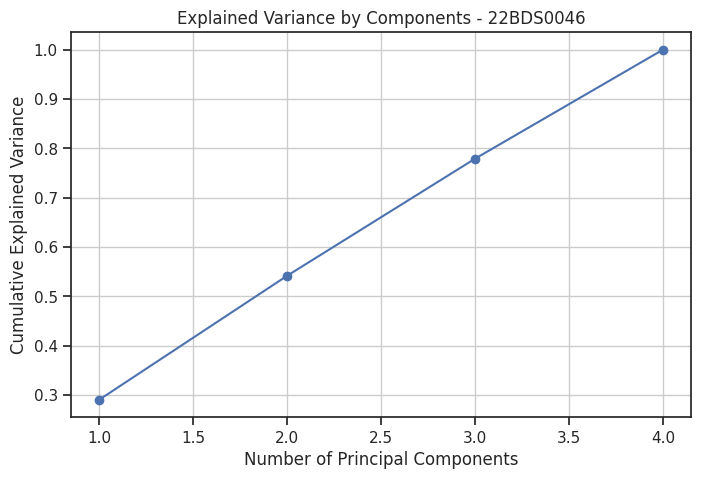


Number of components to retain 95% variance: 4


,PC1,PC2,PC3,PC4
0,1.803556,-1.139397,-0.228784,-1.482518
1,1.916893,-1.200850,-0.031087,-1.592731
2,1.674062,-1.143100,-0.217119,-1.366300
3,1.431230,-1.085350,-0.403150,-1.139868
4,1.045932,-0.979919,-0.742673,-0.778779


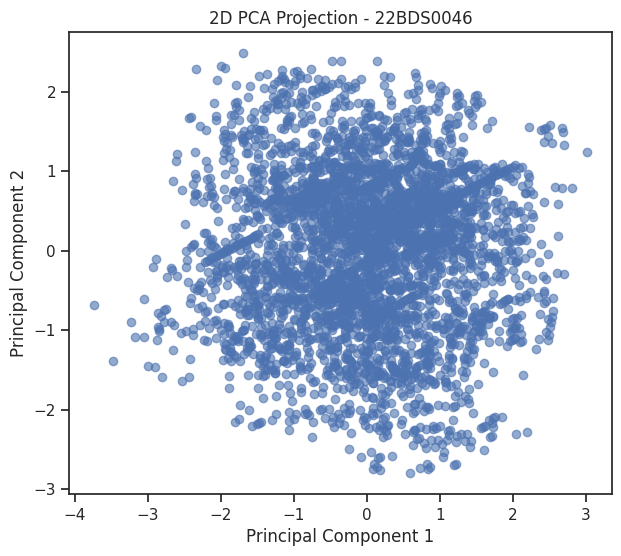

In [99]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=None)
pca.fit(scaled_data)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components - 22BDS0046')
plt.grid(True)
plt.show()

# Choose number of components
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"\nNumber of components to retain 95% variance: {n_components}")

# Step 9: Transform data using selected components
pca_final = PCA(n_components=n_components)
pca_data = pca_final.fit_transform(scaled_data)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
display(pca_df.head())

# 2D Visualization
if n_components >= 2:
    plt.figure(figsize=(7,6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA Projection - 22BDS0046')
    plt.show()


# Regression

Simple Linear Regression


Model Coefficients:
Slope: -0.0025565342781553465
Intercept: 25.612700161743906

Model Performance:
R² Score: 0.0017899432177609365
RMSE: 7.566373321700443


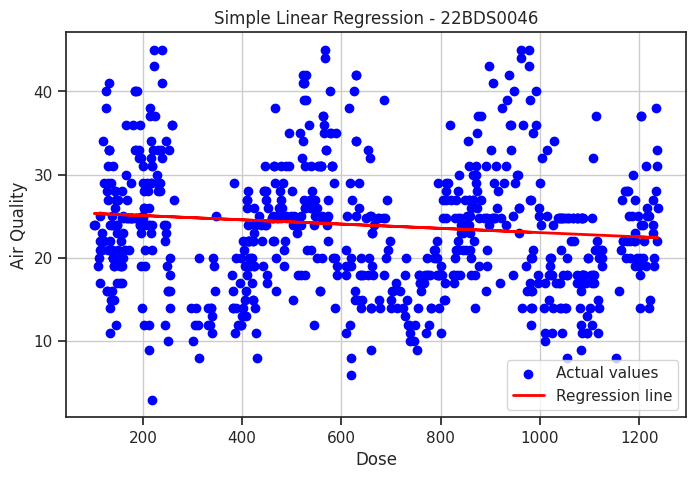

In [58]:
# Selecting independent (X) and dependent (y) variables ---
X = df_0046[['dos']]  # Independent variable(s)
y = df_0046['airq']    # Dependent variable

# Spliting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Displaying results
print("\nModel Coefficients:")
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plotting regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression - 22BDS0046')
plt.xlabel('Dose')
plt.ylabel('Air Quality')
plt.legend()
plt.grid(True)
plt.show()

MODEL PERFORMANCE:
R² Score: 0.0291
RMSE: 7.2966

Model Coefficients:
rownames: -0.0016
id: 0.1473
time: 0.0251
dos: -0.0106
age: 0.0068
sex_encoded: -0.9173
cluster: -1.1733

Intercept: 25.8547


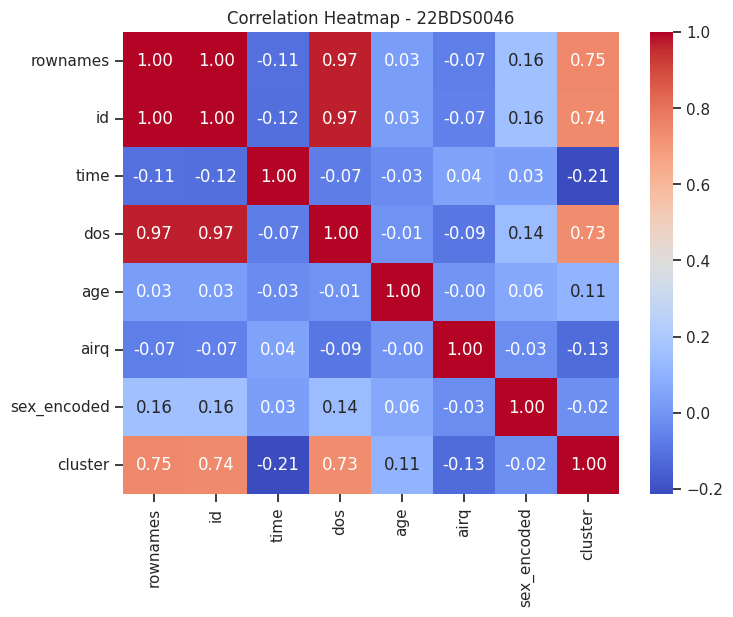

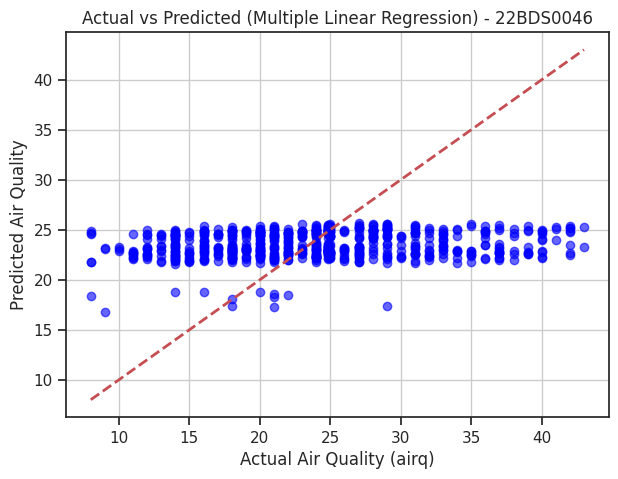

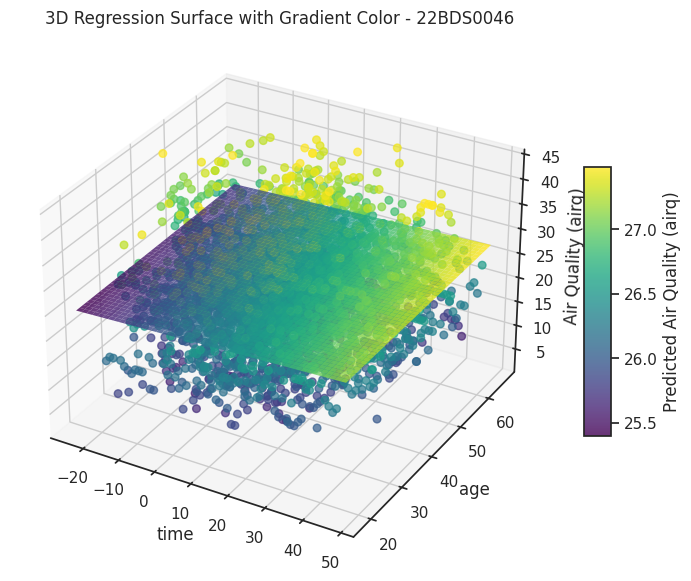

In [100]:
# --- Cleaning and preparing data ---
df_0046 = df_0046.dropna()
numeric_df = df_0046.select_dtypes(include=[np.number])

# --- Choosing predictors (features) and target ---
X = numeric_df.drop(columns=['airq'])   # independent variables
y = numeric_df['airq']                  # dependent variable

# --- Splitting data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Training the model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predicting ---
y_pred = model.predict(X_test)

# --- Evaluating model ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MODEL PERFORMANCE:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}\n")

print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercept: {model.intercept_:.4f}")

# --- Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - 22BDS0046")
plt.show()

# --- Actual vs Predicted Plot ---
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted (Multiple Linear Regression) - 22BDS0046")
plt.xlabel("Actual Air Quality (airq)")
plt.ylabel("Predicted Air Quality")
plt.grid(True)
plt.show()

# --- 3D Regression Plot with Gradient ---
x1_col = 'time'  # first predictor
x2_col = 'age'   # second predictor

# Create a 3D figure
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for predictors
x1_range = np.linspace(df_0046[x1_col].min(), df_0046[x1_col].max(), 50)
x2_range = np.linspace(df_0046[x2_col].min(), df_0046[x2_col].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Compute predicted air quality for each grid point
Z = (model.intercept_ +
     model.coef_[X.columns.get_loc(x1_col)] * x1_grid +
     model.coef_[X.columns.get_loc(x2_col)] * x2_grid)

# Plot the surface with gradient colors
surf = ax.plot_surface(x1_grid, x2_grid, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Scatter the actual data points
sc = ax.scatter(df_0046[x1_col], df_0046[x2_col], df_0046['airq'],
                c=df_0046['airq'], cmap='viridis', s=30, alpha=0.7)

# Add color bar for better interpretation
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Predicted Air Quality (airq)')

# Axis labels and title
ax.set_xlabel(x1_col)
ax.set_ylabel(x2_col)
ax.set_zlabel('Air Quality (airq)')
ax.set_title('3D Regression Surface with Gradient Color - 22BDS0046')
plt.show()

#Classification

Random Forest

Dataset shape: (3598, 12)

Missing values:
 rownames       0
id             0
time           0
dos            0
hatype         0
age            0
airq           0
medication     0
headache       0
sex            0
sex_encoded    0
cluster        0
dtype: int64

Data types:
 rownames     int64
id           int64
time         int64
dos          int64
hatype      object
dtype: object

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       381
           2       1.00      1.00      1.00       119
           3       1.00      0.98      0.99       400

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



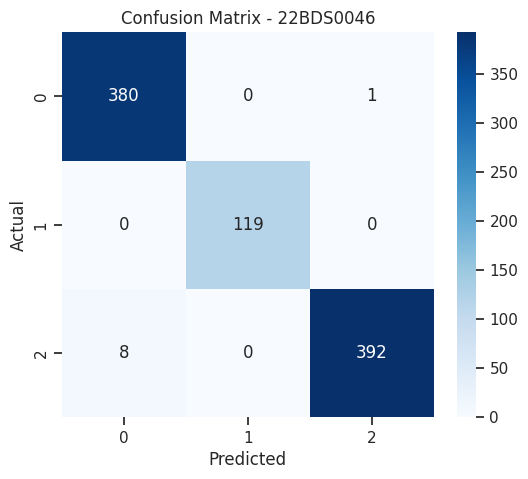

In [101]:
# Basic Exploration
print("Dataset shape:", df_0046.shape)
print("\nMissing values:\n", df_0046.isnull().sum())
print("\nData types:\n", df_0046.dtypes.head())

# Handle Categorical Data
df_encoded = df_0046.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Split Features and Target
# Automatically pick last column as target
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - 22BDS0046')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Naïve Bayes classification

Dataset shape: (3598, 12)

Missing values:
 rownames       0
id             0
time           0
dos            0
hatype         0
age            0
airq           0
medication     0
headache       0
sex            0
sex_encoded    0
cluster        0
dtype: int64

Data types:
 rownames     int64
id           int64
time         int64
dos          int64
hatype      object
dtype: object

✅ Accuracy: 0.9389

📊 Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.94      0.93       381
           2       1.00      1.00      1.00       119
           3       0.95      0.92      0.93       400

    accuracy                           0.94       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.94      0.94      0.94       900



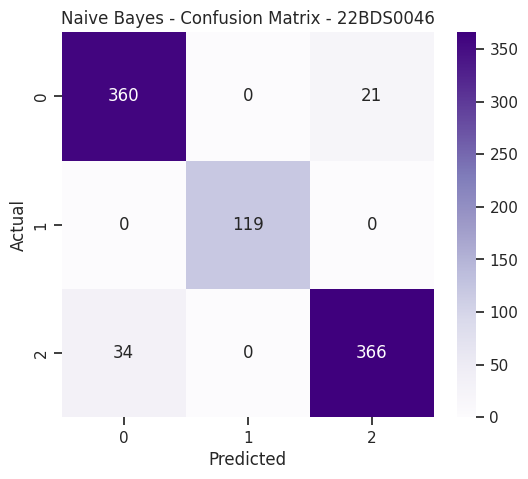

In [102]:
# Basic Info
print("Dataset shape:", df_0046.shape)
print("\nMissing values:\n", df_0046.isnull().sum())
print("\nData types:\n", df_0046.dtypes.head())

# Handle Categorical Data
df_encoded = df_0046.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Splitting Features (X) and Target (y)
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes - Confusion Matrix - 22BDS0046')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Evaluation

Comparison of Actual vs Predicted values:

   Actual  Predicted
0       1          1
1       1          1
2       2          2
3       3          3
4       2          2
5       1          1
6       3          1
7       1          3
8       1          1
9       1          1


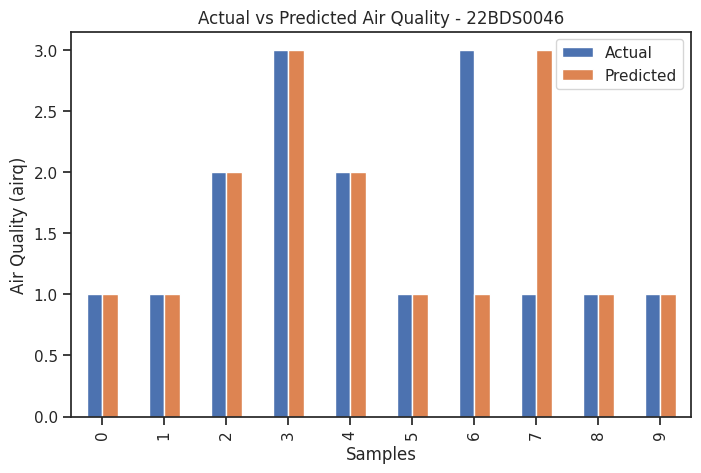


--- Model Evaluation ---
R2 Score: 0.7181651125417948
Mean Absolute Error (MAE): 0.12222222222222222
Mean Squared Error (MSE): 0.24444444444444444
Root Mean Squared Error (RMSE): 0.4944132324730442


In [103]:
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print("Comparison of Actual vs Predicted values:\n")
print(evaluate.head(10))

# Plotting Actual vs Predicted values
evaluate.head(10).plot(kind='bar', figsize=(8,5))
plt.title("Actual vs Predicted Air Quality - 22BDS0046")
plt.xlabel("Samples")
plt.ylabel("Air Quality (airq)")
plt.show()

# Computing evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Model Evaluation ---")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")